In [3]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
news_data=pd.read_csv("NewspaperData.csv")
news_data.head(10)

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [5]:
news_data.shape

(34, 3)

In [6]:
news_data.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


In [7]:
news_data.isnull().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [8]:
news_data.dtypes

Newspaper     object
daily        float64
sunday       float64
dtype: object

## Assumption check

#### linearity test

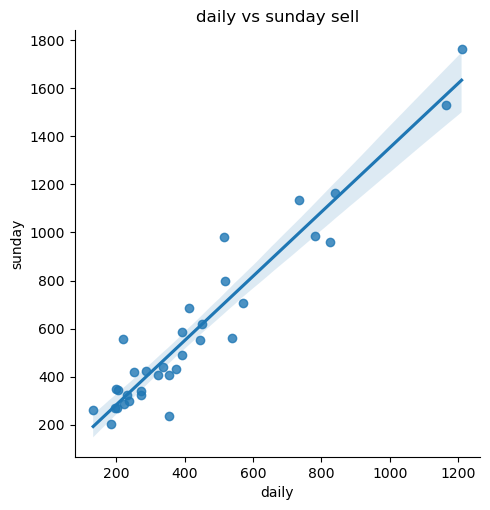

In [9]:
sns.lmplot(data=news_data,x='daily',y='sunday')
plt.title("daily vs sunday sell")
plt.show()

### normality test

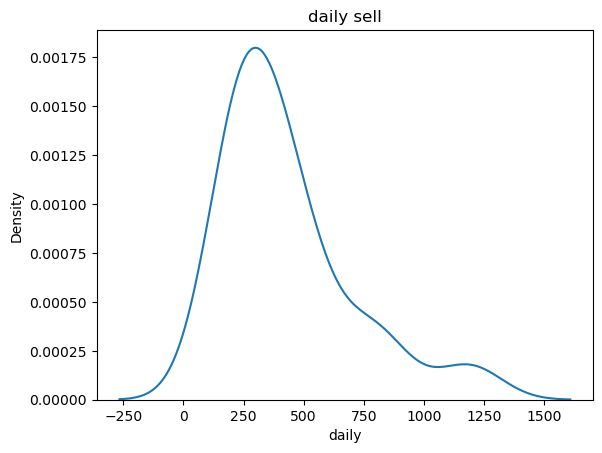

In [10]:
sns.distplot( a=news_data['daily'],hist=False)
plt.title("daily sell")
plt.show()

In [11]:
news_data['daily'].skew()

1.5321591323040094

In [12]:
news_data['daily'].kurtosis()

1.999034084097406

#### here the value of skewness and kurtosis should be less than 3 then the normality test passed
+/- 3 rule of thumb for kurtosis cut-offs. The values for asymmetry and kurtosis between -2 and +2 are considered acceptable in order to prove normal univariate distribution (George & Mallery, 2010). Hair et al. (2010) and Bryne (2010) argued that data is considered to be normal if skewness is between ‐2 to +2 and kurtosis is between ‐7 to +7. 

### model building

In [13]:
import statsmodels.formula.api as smf
linear_model=smf.ols(formula="sunday~daily",data=news_data)

###  Model Training

In [14]:
linear_model=linear_model.fit()

In [15]:


linear_model.params

Intercept    13.835630
daily         1.339715
dtype: float64

### with this values we can make equation for best fir line as y= (1.339715* x) + 13.835630

In [16]:
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           6.02e-19
Time:                        11:49:54   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.7

### Description of some of the terms in the table :
 R- squared value: R-squared value ranges between 0 and 1. An R-squared of 100 percent indicates that all changes in the dependent variable are completely explained by changes in the independent variable(s). if we get 1 as an r-squared value it means there’s a perfect fit. In our example, the r-squared value is 0.918. 
F- statistic: The F statistic simply compares the combined effect of all variables. In simplest terms, reject the null hypothesis if your alpha level is greater than your p-value. 
coef: the coefficients of the independent variables in the regression equation.

In [17]:
x_test=pd.DataFrame( data={'daily':[300,250,585]})
x_test

,daily
0,300
1,250
2,585


### Model testing

#### manual tesing

In [19]:

#If daily sales = 300, sunday sales? ---> 415.75
#(1.339715*300) + 13.835630
#If daily sales = 250, sunday sales? ---> 348.76
#(1.339715*250) + 13.835630
#If daily sales = 585, sunday sales? ---> 797.56
y=(1.339715*585) + 13.835630
print(y)

797.5689050000001


#### Automatic Prediction

In [20]:
linear_model.predict(x_test)

0    415.750057
1    348.764319
2    797.568763
dtype: float64

In [21]:
linear_model.predict(x_test)

0    415.750057
1    348.764319
2    797.568763
dtype: float64

### model diployment

In [22]:
from pickle import dump

In [23]:
dump(linear_model,open("linear_intelligence.pkl",'wb'))


In [24]:
from pickle import load

In [25]:
loaded_linear_model=load(open('linear_intelligence.pkl','rb'))


In [26]:
load(open('linear_intelligence.pkl','rb'))

In [27]:
loaded_linear_model.predict(x_test)

0    415.750057
1    348.764319
2    797.568763
dtype: float64